<h1><b><center> Personalized Medicine: Redefining Cancer Treatment </center></b></h1>
<img src='https://storage.googleapis.com/kaggle-competitions/kaggle/6841/media/79842_Web-hero-image_ALT-3.jpg'>

<a href="https://colab.research.google.com/drive/1z6F_HdNev7Fvowxzihjm9XXs239Edi3X#scrollTo=xCjRvTxKOQuR" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## 1. Problem Description

A lot has been said during the past several years about how precision medicine and, more concretely, how genetic testing is going to disrupt the way diseases like cancer are treated.

Once sequenced, a cancer tumor can have thousands of genetic mutations. But the challenge is distinguishing the mutations that contribute to tumor growth (drivers) from the neutral mutations (passengers). 

Currently this interpretation of genetic mutations is being done manually. This is a very time-consuming task where a clinical pathologist has to manually review and classify every single genetic mutation based on evidence from text-based clinical literature.

For this competition MSKCC is making available an expert-annotated knowledge base where world-class researchers and oncologists have manually annotated thousands of mutations.

<b>Problem statement: </b>

Develop Machine Learning algorithm that, using gene knowledge base as a baseline, automatically classifies genetic variations.

Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/overview

## 2. Problem Overview

### 2.1 Data Description

In this problem statement we have to develop algorithms to classify genetic mutations based on clinical evidence (text).

Both, training and test, data sets are provided via two different files. One (training/test_variants) provides the information about the genetic mutations, whereas the other (training/test_text) provides the clinical evidence (text) that our human experts used to classify the genetic mutations. Both are linked via the ID field.

Therefore the genetic mutation (row) with ID=15 in the file training_variants, was classified using the clinical evidence (text) from the row with ID=15 in the file training_text

### 2.2 Machine Learning Problem

Since there are nine different classes a genetic mutation that can be classified on, this is a multiclass classification problem.

### 2.3 Performance metric

The performance metric defined for this problem statement is multi-class log loss.

Log loss is given by : -log P(yt|yp) = -(yt log(yp) + (1 - yt) log(1 - yp))

For more info <a href='https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html'>click here</a>

### 2.4 Example Data Point

<h6>training_variants</h6>
<hr>
ID,Gene,Variation,Class<br>
0,FAM58A,Truncating Mutations,1 <br>
1,CBL,W802*,2 <br>
2,CBL,Q249E,2 <br>
...

<h6> training_text</h6>
<hr>
ID,Text <br>
0||Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK10 silencing in increasing c-Raf and in conferring tamoxifen resistance to breast cancer cells. CDK10/cyclin M phosphorylates ETS2 in vitro, and in cells it positively controls ETS2 degradation by the proteasome. ETS2 protein levels are increased in cells derived from a STAR patient, and this increase is attributable to decreased cyclin M levels. Altogether, our results reveal an additional regulatory mechanism for ETS2, which plays key roles in cancer and development. They also shed light on the molecular mechanisms underlying STAR syndrome.Cyclin-dependent kinases (CDKs) play a pivotal role in the control of a number of fundamental cellular processes (1). The human genome contains 21 genes encoding proteins that can be considered as members of the CDK family owing to their sequence similarity with bona fide CDKs, those known to be activated by cyclins (2). Although discovered almost 20 y ago (3, 4), CDK10 remains one of the two CDKs without an identified cyclin partner. This knowledge gap has largely impeded the exploration of its biological functions. CDK10 can act as a positive cell cycle regulator in some cells (5, 6) or as a tumor suppressor in others (7, 8). CDK10 interacts with the ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2) transcription factor and inhibits its transcriptional activity through an unknown mechanism (9). CDK10 knockdown derepresses ETS2, which increases the expression of the c-Raf protein kinase, activates the MAPK pathway, and induces resistance of MCF7 cells to tamoxifen (6). ... 

## 3. Exploratory Data Analysis

### 3.1 Importing data and  necessary libraries

In [1]:
import re
import time
import nltk
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from scipy.sparse import hstack
from wordcloud import WordCloud
from nltk.corpus import stopwords
from prettytable import PrettyTable
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import VotingClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV
from sklearn.feature_extraction.text import TfidfVectorizer
warnings.filterwarnings("ignore")
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


True

#### 3.1.1. Reading Gene and Variation Data

In [2]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.183 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kagglesdsdata/competitions/6841/44307/training_variants.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1605179206&Signature=VX3KKWXqpx7Db9%2FrYBpCaUkT2U5IVIr5jUbCzy6QefYBt03JNXzqp1wbJ4lnfvDlN1xU6PtzTUElrF6WXrVXF2gj%2FkpnTxv6C%2FOm6UiLeH4jeryvGVjXg6bHwTEF3FhTf%2Fj2ajA696QaHRUPJorEdBhJh54nqUf0zhsccX5vTQT79r1z8OSnws2S5dl74jnYdpbuGKRa%2B4PnJtS07I021MXOQe9DTt8tfxoVrMxig2af6pXWY6n9%2FhFTh8SjJp82wTfXNSHuUEvPMbUZZ7lDN9BQn%2B4VHC9znyMFT0dWz45Fvy6rwvy2rxs%2B4wEWqkeQMlzPhZHp9AyII9GMwFTrTw%3D%3D&response-content-disposition=attachment%3B+filename%3Dtraining_variants.zip" -c -O 'training_variants.zip'

--2020-11-09 16:42:04--  https://storage.googleapis.com/kagglesdsdata/competitions/6841/44307/training_variants.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1605179206&Signature=VX3KKWXqpx7Db9%2FrYBpCaUkT2U5IVIr5jUbCzy6QefYBt03JNXzqp1wbJ4lnfvDlN1xU6PtzTUElrF6WXrVXF2gj%2FkpnTxv6C%2FOm6UiLeH4jeryvGVjXg6bHwTEF3FhTf%2Fj2ajA696QaHRUPJorEdBhJh54nqUf0zhsccX5vTQT79r1z8OSnws2S5dl74jnYdpbuGKRa%2B4PnJtS07I021MXOQe9DTt8tfxoVrMxig2af6pXWY6n9%2FhFTh8SjJp82wTfXNSHuUEvPMbUZZ7lDN9BQn%2B4VHC9znyMFT0dWz45Fvy6rwvy2rxs%2B4wEWqkeQMlzPhZHp9AyII9GMwFTrTw%3D%3D&response-content-disposition=attachment%3B+filename%3Dtraining_variants.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.20.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24831 (24K) [application/zip]
Saving to: ‘training_variants.zip’

training_variants.z 100

In [3]:
data = pd.read_csv('training_variants.zip')
print('Number of data points:', data.shape[0])
print('Number of features:', data.shape[1])
print('Features:', data.columns.values)

Number of data points: 3321
Number of features: 4
Features: ['ID' 'Gene' 'Variation' 'Class']


In [4]:
data.head()

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


- ID : the id of the row used to link the mutation to the clinical evidence
- Gene : the gene where this genetic mutation is located
- Variation : the aminoacid change for this mutations
- Class : 1-9 the class this genetic mutation has been classified on

#### 3.1.2. Reading Text Data

In [5]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.183 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kagglesdsdata/competitions/6841/44307/training_text.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1605179371&Signature=hb2p60J8FJtw0GGrmeGEsCKSIa6K%2FGYI93hEl0qnlQh25VjQA%2FJzE5gc%2B6q7SODwPouXmb0RMSoruHKJl3aAJWRR1KopeHM1PnEGxGOzg7aO4JgVxbdX8xD2mJJ8UfEjyIZKTNfbqxeIPtKg30vyEIPUekGnXRQJtntpkfKg5pzC%2FbkVakyB1ZWTQBCFPiRs%2FWGU9taa7KU87NjVLUlc0%2BhrC%2F9dhibB4298%2BcSwkpvWAQhOFCKwy%2F8uvpSvc%2Fs4JkuKyGCVJKX5Xg%2B2q5q3qPv5okvO0LSXO%2FNq8QejZry8KO8%2BNLmypF4J4h14zNYmZduZcxWS93hbIvbGw%2FNGqA%3D%3D&response-content-disposition=attachment%3B+filename%3Dtraining_text.zip" -c -O 'training_text.zip'

--2020-11-09 16:42:05--  https://storage.googleapis.com/kagglesdsdata/competitions/6841/44307/training_text.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1605179371&Signature=hb2p60J8FJtw0GGrmeGEsCKSIa6K%2FGYI93hEl0qnlQh25VjQA%2FJzE5gc%2B6q7SODwPouXmb0RMSoruHKJl3aAJWRR1KopeHM1PnEGxGOzg7aO4JgVxbdX8xD2mJJ8UfEjyIZKTNfbqxeIPtKg30vyEIPUekGnXRQJtntpkfKg5pzC%2FbkVakyB1ZWTQBCFPiRs%2FWGU9taa7KU87NjVLUlc0%2BhrC%2F9dhibB4298%2BcSwkpvWAQhOFCKwy%2F8uvpSvc%2Fs4JkuKyGCVJKX5Xg%2B2q5q3qPv5okvO0LSXO%2FNq8QejZry8KO8%2BNLmypF4J4h14zNYmZduZcxWS93hbIvbGw%2FNGqA%3D%3D&response-content-disposition=attachment%3B+filename%3Dtraining_text.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.20.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63917183 (61M) [application/zip]
Saving to: ‘training_text.zip’

training_text.zip   

In [6]:
data_text = pd.read_csv(r"training_text.zip", sep="\|\|", engine="python", names=["ID", "TEXT"], skiprows=1)
print('Number of data points:', data_text.shape[0])
print('Number of features:', data_text.shape[1])
print('Features:', data_text.columns.values)

Number of data points: 3321
Number of features: 2
Features: ['ID' 'TEXT']


In [7]:
data_text.head()

,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


### 3.2 Preprocessing of text

In [8]:
stop_words = set(stopwords.words('english'))

def text_preprocessing(total_text):
    if isinstance(total_text, str):
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text) #removing all characters except alphanumeric
        total_text = re.sub('\s+',' ', total_text) #replacing extra white spaces with single whitespace
        total_text = total_text.lower()
        total_text = ' '.join([word for word in total_text.split() if word not in stop_words]) #removing stopwords
        return total_text
    else:
        return total_text

In [9]:
start = time.time()
data_text['TEXT'] = data_text['TEXT'].apply(text_preprocessing)
for indexes in list(data_text.loc[:, 'ID'][data_text['TEXT'].isnull()].values):
    print('There is no description for ID:', indexes)
print('Total time required for preprocessing the text: ', round(time.time() - start, 2), 'seconds')

There is no description for ID: 1109
There is no description for ID: 1277
There is no description for ID: 1407
There is no description for ID: 1639
There is no description for ID: 2755
Total time required for preprocessing the text:  24.34 seconds


In [10]:
result = pd.merge(data, data_text, on='ID', how='left')
result.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


Finding out rows with no TEXT description

In [11]:
result[result.isnull().any(axis=1)]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,NaN
1277,1277,ARID5B,Truncating Mutations,1,NaN
1407,1407,FGFR3,K508M,6,NaN
1639,1639,FLT1,Amplification,6,NaN
2755,2755,BRAF,G596C,7,NaN


For all the 5 location where text is not available we will replace them with their respective gene and variation names

In [12]:
result.loc[result['TEXT'].isnull(),'TEXT'] = result['Gene'] + ' ' +result['Variation']

In [13]:
result[result['ID']==1109]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,FANCA S1088F


### 3.3 Generating wordcloud for text

In [14]:
gene_text = result['TEXT'].values
text = ' '.join([sentence for sentence in gene_text])
final_text = ' '.join([word for word in text.split(' ') if word not in stop_words])

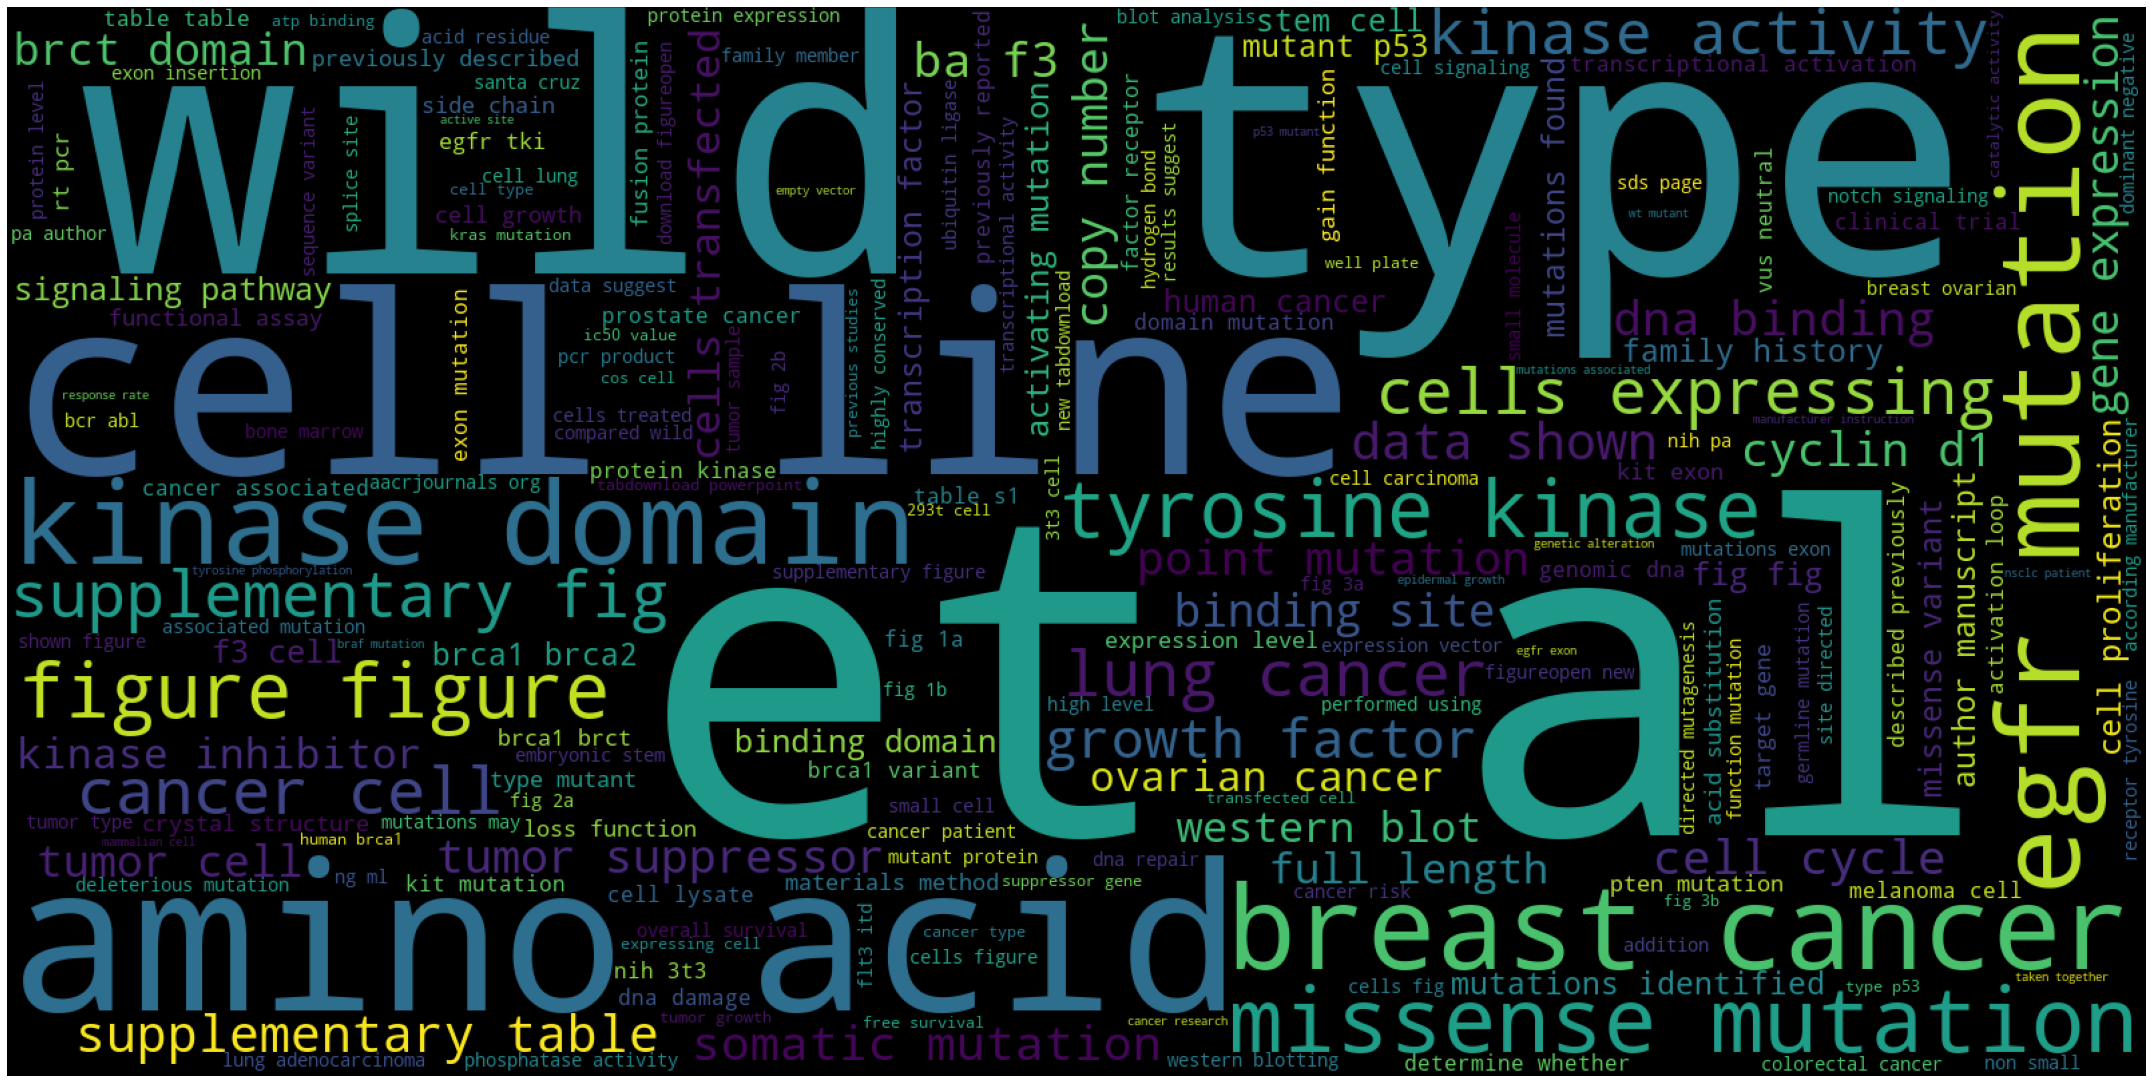

In [15]:
wordcloud = WordCloud(width=1600, height=800).generate(final_text)
fig = plt.figure(figsize=(30, 20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout()
plt.show()

## 4. Data splitting and vectorization

### 4.1 Train, cross validation, test split

In [16]:
y_true = result['Class'].values

x_tr, x_test, y_tr, y_test = train_test_split(result, y_true, test_size=0.2, stratify=y_true, random_state=0)
x_train, x_cv, y_train, y_cv = train_test_split(x_tr, y_tr, test_size=0.2, stratify=y_tr, random_state=0)

We are doing stratified splitting of data in train data, cross validation data and test data (64:16:20)

In [17]:
print('Number of data points in train data:', x_train.shape[0])
print('Number of data points in cross validation data:', x_cv.shape[0])
print('Number of data points in test data:', x_test.shape[0])

Number of data points in train data: 2124
Number of data points in cross validation data: 532
Number of data points in test data: 665


Checking the distribution of y_i's in Train, Cross Validation and Test datasets after stratified split

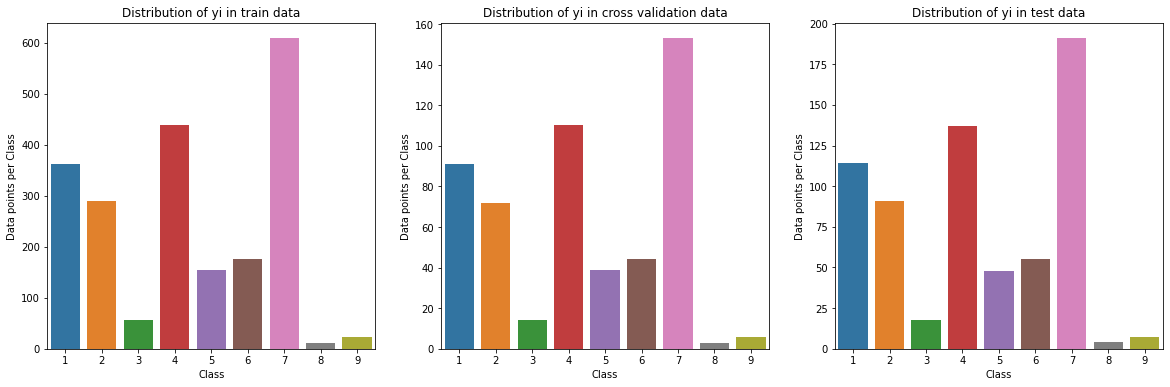

In [18]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
sns.countplot(x='Class', data=x_train)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.subplot(1, 3, 2)
sns.countplot(x='Class', data=x_cv)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.subplot(1, 3, 3)
sns.countplot(x='Class', data=x_test)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.show()

### 4.2 Vectorizing the data

#### 4.2.1 Vectorizing 'Gene' feature

In [19]:
gene_tfidfvectorizer = TfidfVectorizer()
train_gene_tfidf = gene_tfidfvectorizer.fit_transform(x_train.Gene)
cv_gene_tfidf = gene_tfidfvectorizer.transform(x_cv.Gene)
test_gene_tfidf = gene_tfidfvectorizer.transform(x_test.Gene)

In [20]:
print("Tfidf vectorized features for Gene data:")
print("(Number of data points , number of features) in train data = ", train_gene_tfidf.shape)
print("(Number of data points , number of features) in cross validation data = ", cv_gene_tfidf.shape)
print("(Number of data points , number of features) in test data =", test_gene_tfidf.shape)

Tfidf vectorized features for Gene data:
(Number of data points , number of features) in train data =  (2124, 225)
(Number of data points , number of features) in cross validation data =  (532, 225)
(Number of data points , number of features) in test data = (665, 225)


#### 4.2.3 Vectorizing 'Variation' feature

In [21]:
variation_tfidfvectorizer = TfidfVectorizer()
train_variation_tfidf = variation_tfidfvectorizer.fit_transform(x_train.Variation)
cv_variation_tfidf = variation_tfidfvectorizer.transform(x_cv.Variation)
test_variation_tfidf = variation_tfidfvectorizer.transform(x_test.Variation)

In [22]:
print("Tfidf vectorized features for Variation data:")
print("(Number of data points , number of features) in train data = ", train_variation_tfidf.shape)
print("(Number of data points , number of features) in cross validation data =", cv_variation_tfidf.shape)
print("(Number of data points , number of features) in test data = ", test_variation_tfidf.shape)

Tfidf vectorized features for Variation data:
(Number of data points , number of features) in train data =  (2124, 1958)
(Number of data points , number of features) in cross validation data = (532, 1958)
(Number of data points , number of features) in test data =  (665, 1958)


#### 4.2.3 Vectorizing 'TEXT' feature

In [23]:
text_tfidfvectorizer = TfidfVectorizer()
train_text_tfidf = text_tfidfvectorizer.fit_transform(x_train.TEXT)
cv_text_tfidf = text_tfidfvectorizer.transform(x_cv.TEXT)
test_text_tfidf = text_tfidfvectorizer.transform(x_test.TEXT)

In [24]:
print("Tfidf vectorized features for TEXT data:")
print("(Number of data points , number of features) in train data = ", train_text_tfidf.shape)
print("(Number of data points , number of features) in cross validation data =", cv_text_tfidf.shape)
print("(Number of data points , number of features) in test data = ", test_text_tfidf.shape)

Tfidf vectorized features for TEXT data:
(Number of data points , number of features) in train data =  (2124, 126482)
(Number of data points , number of features) in cross validation data = (532, 126482)
(Number of data points , number of features) in test data =  (665, 126482)


#### 4.2.4 Stacking all the vectorized features

In [25]:
train_tfidf = hstack((train_gene_tfidf, train_variation_tfidf, train_text_tfidf)).tocsr()
cv_tfidf = hstack((cv_gene_tfidf, cv_variation_tfidf, cv_text_tfidf)).tocsr()
test_tfidf = hstack((test_gene_tfidf, test_variation_tfidf, test_text_tfidf)).tocsr()

In [26]:
print("Stacked tfidf vectorized features :")
print("(Number of data points , number of features) in train data = ", train_tfidf.shape)
print("(Number of data points , number of features) in cross validation data =", cv_tfidf.shape)
print("(Number of data points , number of features) in test data = ", test_tfidf.shape)

Stacked tfidf vectorized features :
(Number of data points , number of features) in train data =  (2124, 128665)
(Number of data points , number of features) in cross validation data = (532, 128665)
(Number of data points , number of features) in test data =  (665, 128665)


## 5. Machine Learning Models

### 5.1 Prediction using a Random Model

We are creating a helper function which will help us to plot the confusion matrix for our predicted output.

In [27]:
def plot_confusion_matrix(test_y, predict_y):
    C = metrics.confusion_matrix(test_y, predict_y)
    labels = [1, 2, 3, 4, 5, 6, 7, 8, 9]
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

<p style="font-size:16px"> In a 'Random' Model, we generate the 9 class probabilites randomly such that they sum to 1. </p>

Log loss on Cross Validation Data using Random Model 2.46309397240481
Log loss on Test Data using Random Model 2.451895882320172
-------------------- Confusion matrix --------------------


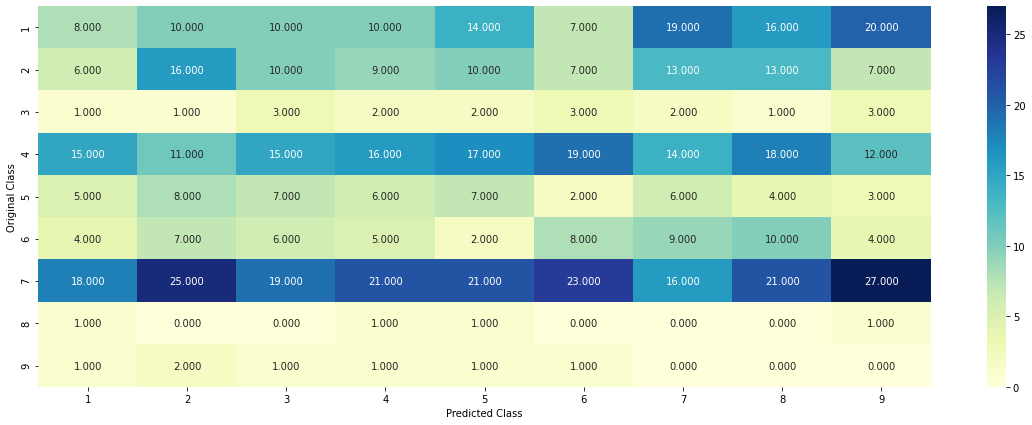

In [28]:
test_data_len = x_test.shape[0]
cv_data_len = x_cv.shape[0]

cv_predicted_y = np.zeros((cv_data_len, 9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1, 9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model", metrics.log_loss(y_cv,cv_predicted_y))

test_predicted_y = np.zeros((test_data_len, 9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1, 9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model", metrics.log_loss(y_test, test_predicted_y))

predicted_y = np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)

### 5.2 Naive Bayes

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable. 

For more info <a href='https://scikit-learn.org/stable/modules/naive_bayes.html'> Naive Bayes</a>

#### 5.2.1 Hyperparameter tuning

We are doing manual hyperparameter tuning to get CV scores for each value of alpha

When performing classification you often want not only to predict the class label, but also obtain a probability of the respective label. This probability gives you some kind of confidence on the prediction. Some models can give you poor estimates of the class probabilities and some even do not support probability prediction. The calibration module allows you to better calibrate the probabilities of a given model, or to add support for probability prediction.

For more info: <a href='https://scikit-learn.org/stable/modules/calibration.html#calibration'>Calibrated Classifier </a>

For alpha = 1e-05 the cv log loss is 1.1508778407558296
For alpha = 0.0001 the cv log loss is 1.1498786736274158
For alpha = 0.001 the cv log loss is 1.147957563852385
For alpha = 0.01 the cv log loss is 1.149970210411357
For alpha = 0.1 the cv log loss is 1.2263127637918665
For alpha = 1 the cv log loss is 1.22507255361087
For alpha = 10 the cv log loss is 1.2293693842519309
For alpha = 100 the cv log loss is 1.2678288917968794


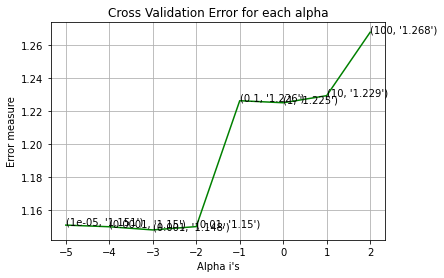

In [29]:
alpha = [10 ** x for x in range(-5, 3)]

log_error_array = []
for i in alpha:
    clf = MultinomialNB(alpha=i)
    sig_clf = CalibratedClassifierCV(clf, method='sigmoid')
    sig_clf.fit(train_tfidf, y_train)
    pred_y = sig_clf.predict_proba(cv_tfidf)
    log_error_array.append(metrics.log_loss(y_cv, pred_y, labels=sig_clf.classes_))
    print('For alpha = {} the cv log loss is {}'.format(i, metrics.log_loss(y_cv, pred_y, labels=sig_clf.classes_)))

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), log_error_array, c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],  str(txt)), (np.log10(alpha[i]), log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

#### 5.2.2 Testing the model with best hyperparamter

The best alpha is 0.001
The train log loss is : 1.1113021305466084
The cv log loss is : 1.2221799473693975
The test log loss is : 1.2040507659862307
-------------------- Confusion matrix --------------------


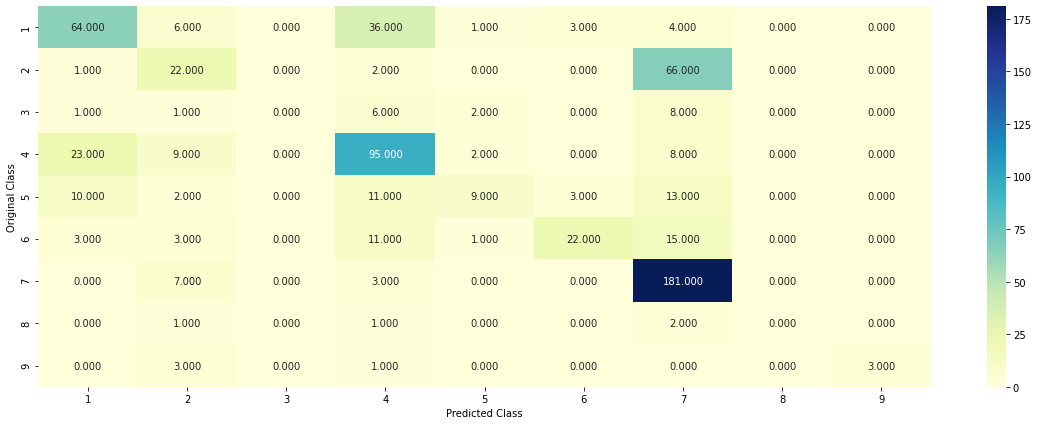

In [30]:
best_alpha = alpha[np.argmin(log_error_array)]
clf = MultinomialNB(alpha=i)
sig_clf = CalibratedClassifierCV(clf, method='sigmoid')
sig_clf.fit(train_tfidf, y_train)

print('The best alpha is {}'.format(best_alpha))
y_pred = sig_clf.predict_proba(train_tfidf)
print('The train log loss is : {}'.format(metrics.log_loss(y_train, y_pred)))
y_pred = sig_clf.predict_proba(cv_tfidf)
print('The cv log loss is : {}'.format(metrics.log_loss(y_cv, y_pred)))
y_pred = sig_clf.predict_proba(test_tfidf)
print('The test log loss is : {}'.format(metrics.log_loss(y_test, y_pred)))

plot_confusion_matrix(y_test, sig_clf.predict(test_tfidf))

### 5.3 Logistic Regression (with class balancing)

The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)). The balanced class weight allows the samples with lower frequency to dominate equally with other class labels.

#### 5.3.1 Hyperparamter tuning

We are doing manual hyperparameter tuning to get CV scores for each value of alpha

To use Logistic regression using SGD we have to set loss parameter to 'log' 

For alpha = 1e-05 the cv log loss is 1.0013550222775338
For alpha = 0.0001 the cv log loss is 0.9582048407875342
For alpha = 0.001 the cv log loss is 1.0228457072510895
For alpha = 0.01 the cv log loss is 1.1759260135776837
For alpha = 0.1 the cv log loss is 1.4002899754822211
For alpha = 1 the cv log loss is 1.506091579563025
For alpha = 10 the cv log loss is 1.5200699873864127


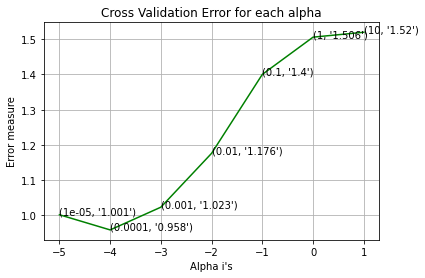

In [31]:
alpha = [10 ** x for x in range(-5, 2)]

log_error_array = []
for i in alpha:
    clf = SGDClassifier(alpha=i, loss='log', penalty='l2', random_state=42, class_weight='balanced')
    sig_clf = CalibratedClassifierCV(clf, method='sigmoid')
    sig_clf.fit(train_tfidf, y_train)
    pred_y = sig_clf.predict_proba(cv_tfidf)
    log_error_array.append(metrics.log_loss(y_cv, pred_y, labels=sig_clf.classes_))
    print('For alpha = {} the cv log loss is {}'.format(i, metrics.log_loss(y_cv, pred_y, labels=sig_clf.classes_)))

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), log_error_array, c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],  str(txt)), (np.log10(alpha[i]), log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

#### 5.3.2 Testing the model with best hyperparamter

The best alpha is 0.0001
The train log loss is : 0.3626517926937128
The cv log loss is : 0.9582048407875342
The test log loss is : 0.9375562200952839
-------------------- Confusion matrix --------------------


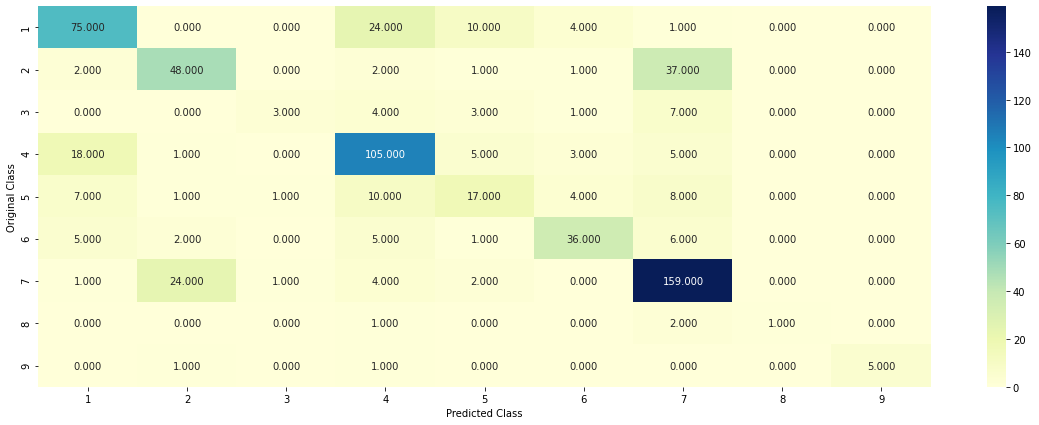

In [32]:
best_alpha = alpha[np.argmin(log_error_array)]
clf = SGDClassifier(alpha=best_alpha, loss='log', penalty='l2', random_state=42, class_weight='balanced')
sig_clf = CalibratedClassifierCV(clf, method='sigmoid')
sig_clf.fit(train_tfidf, y_train)

print('The best alpha is {}'.format(best_alpha))
y_pred = sig_clf.predict_proba(train_tfidf)
print('The train log loss is : {}'.format(metrics.log_loss(y_train, y_pred)))
y_pred = sig_clf.predict_proba(cv_tfidf)
print('The cv log loss is : {}'.format(metrics.log_loss(y_cv, y_pred)))
y_pred = sig_clf.predict_proba(test_tfidf)
print('The test log loss is : {}'.format(metrics.log_loss(y_test, y_pred)))

plot_confusion_matrix(y_test, sig_clf.predict(test_tfidf))

### 5.4 Logistic Regression (without class balancing)

This estimator implements regularized linear models with stochastic gradient descent (SGD) learning: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate).

For more info <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html'>SGD</a>

#### 5.4.1 Hyperparameter tuning

We are doing manual hyperparameter tuning to get CV scores for each value of alpha

For alpha = 1e-05 the cv log loss is 1.0099541736160702
For alpha = 0.0001 the cv log loss is 0.9609740842357706
For alpha = 0.001 the cv log loss is 1.0221078776106107
For alpha = 0.01 the cv log loss is 1.1683073230190129
For alpha = 0.1 the cv log loss is 1.3753808256541542
For alpha = 1 the cv log loss is 1.4750705246476428
For alpha = 10 the cv log loss is 1.487221110386915


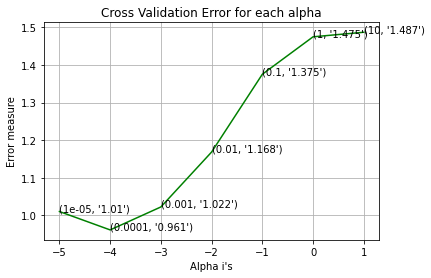

In [33]:
alpha = [10 ** x for x in range(-5, 2)]

log_error_array = []
for i in alpha:
    clf = SGDClassifier(alpha=i, loss='log', penalty='l2', random_state=42)
    sig_clf = CalibratedClassifierCV(clf, method='sigmoid')
    sig_clf.fit(train_tfidf, y_train)
    pred_y = sig_clf.predict_proba(cv_tfidf)
    log_error_array.append(metrics.log_loss(y_cv, pred_y, labels=sig_clf.classes_))
    print('For alpha = {} the cv log loss is {}'.format(i, metrics.log_loss(y_cv, pred_y, labels=sig_clf.classes_)))

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), log_error_array, c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],  str(txt)), (np.log10(alpha[i]), log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

#### 5.4.2 Testing model with best hyper parameters

The best alpha is 0.0001
The train log loss is : 0.35208311434717393
The cv log loss is : 0.9609740842357706
The test log loss is : 0.9355948422648375
-------------------- Confusion matrix --------------------


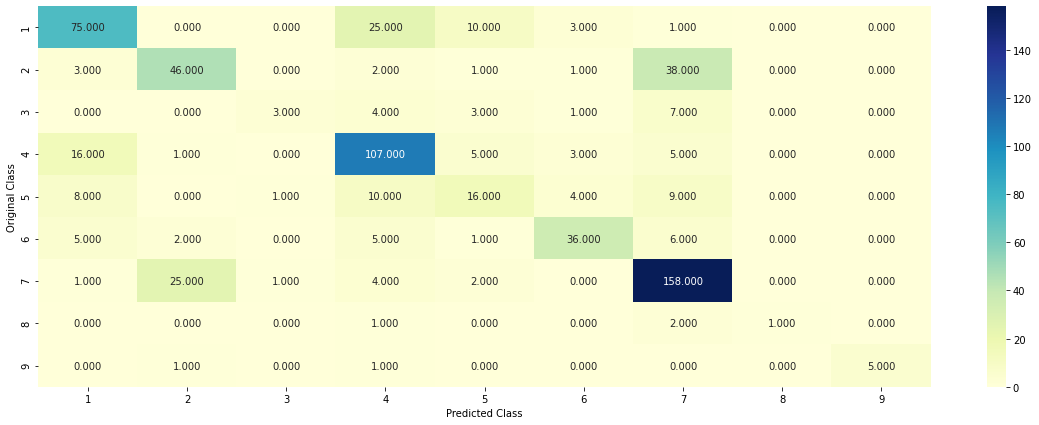

In [34]:
best_alpha = alpha[np.argmin(log_error_array)]
clf = SGDClassifier(alpha=best_alpha, loss='log', penalty='l2', random_state=42)
sig_clf = CalibratedClassifierCV(clf, method='sigmoid')
sig_clf.fit(train_tfidf, y_train)

print('The best alpha is {}'.format(best_alpha))
y_pred = sig_clf.predict_proba(train_tfidf)
print('The train log loss is : {}'.format(metrics.log_loss(y_train, y_pred)))
y_pred = sig_clf.predict_proba(cv_tfidf)
print('The cv log loss is : {}'.format(metrics.log_loss(y_cv, y_pred)))
y_pred = sig_clf.predict_proba(test_tfidf)
print('The test log loss is : {}'.format(metrics.log_loss(y_test, y_pred)))

plot_confusion_matrix(y_test, sig_clf.predict(test_tfidf))

 ### 5.5 Linear Support Vector Machines

#### 5.5.1 Hyperparamter tuning

We are doing manual hyperparameter tuning to get CV scores for each value of alpha

To use Logistic regression using SGD we have to set loss parameter to 'hinge'

For alpha = 1e-05 the cv log loss is 1.097036505865179
For alpha = 0.0001 the cv log loss is 1.0110156914979
For alpha = 0.001 the cv log loss is 1.0811940150655042
For alpha = 0.01 the cv log loss is 1.2590545177584878
For alpha = 0.1 the cv log loss is 1.4256956236217693
For alpha = 1 the cv log loss is 1.5221404290058025
For alpha = 10 the cv log loss is 1.5221404729770032


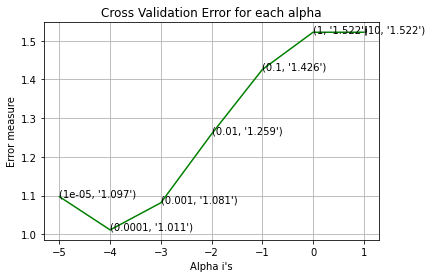

In [35]:
alpha = [10 ** x for x in range(-5, 2)]

log_error_array = []
for i in alpha:
    clf = SGDClassifier(alpha=i, loss='hinge', penalty='l2', random_state=42, class_weight='balanced')
    sig_clf = CalibratedClassifierCV(clf, method='sigmoid')
    sig_clf.fit(train_tfidf, y_train)
    pred_y = sig_clf.predict_proba(cv_tfidf)
    log_error_array.append(metrics.log_loss(y_cv, pred_y, labels=sig_clf.classes_))
    print('For alpha = {} the cv log loss is {}'.format(i, metrics.log_loss(y_cv, pred_y, labels=sig_clf.classes_)))

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), log_error_array, c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],  str(txt)), (np.log10(alpha[i]), log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

#### 5.5.2 Testing model with best hyper parameters

The best alpha is 0.0001
The train log loss is : 0.3175169269239127
The cv log loss is : 1.0110156914979
The test log loss is : 0.9979655317956361
-------------------- Confusion matrix --------------------


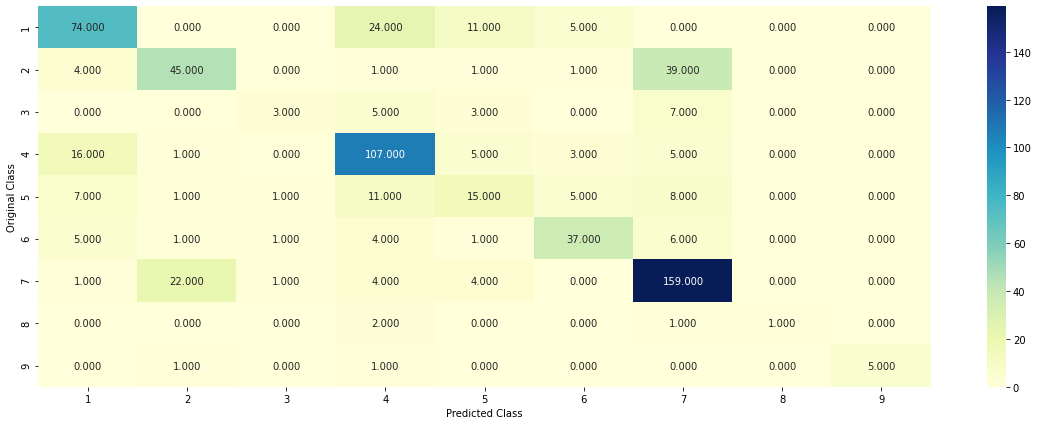

In [36]:
best_alpha = alpha[np.argmin(log_error_array)]
clf = SGDClassifier(alpha=best_alpha, loss='hinge', penalty='l2', random_state=42, class_weight='balanced')
sig_clf = CalibratedClassifierCV(clf, method='sigmoid')
sig_clf.fit(train_tfidf, y_train)

print('The best alpha is {}'.format(best_alpha))
y_pred = sig_clf.predict_proba(train_tfidf)
print('The train log loss is : {}'.format(metrics.log_loss(y_train, y_pred)))
y_pred = sig_clf.predict_proba(cv_tfidf)
print('The cv log loss is : {}'.format(metrics.log_loss(y_cv, y_pred)))
y_pred = sig_clf.predict_proba(test_tfidf)
print('The test log loss is : {}'.format(metrics.log_loss(y_test, y_pred)))

plot_confusion_matrix(y_test, sig_clf.predict(test_tfidf))

### 5.6 Stacking classifier

Stacking classifier is one of the most popular and powerful ensembling techniques.
Stacked generalization consists in stacking the output of individual estimator and use a classifier to compute the final prediction. Stacking allows to use the strength of each individual estimator by using their output as input of a final estimator.

For more info <a href='https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html'>Stacking Classifier</a>

#### 5.6.1 Hyperparameter tuning

We are doing manual hyperparameter tuning to get CV scores for each value of alpha

Logistic Regression :  cv Log Loss: 0.96
Support vector machine : cv Log Loss: 1.02
Naive Bayes : cv Log Loss: 1.15
--------------------------------------------------
Stacking Classifer : For the value of alpha: 0.000010   Log Loss: 1.828
Stacking Classifer : For the value of alpha: 0.000100   Log Loss: 1.807
Stacking Classifer : For the value of alpha: 0.001000   Log Loss: 1.643
Stacking Classifer : For the value of alpha: 0.010000   Log Loss: 1.200
Stacking Classifer : For the value of alpha: 0.100000   Log Loss: 1.101
Stacking Classifer : For the value of alpha: 1.000000   Log Loss: 1.312
Stacking Classifer : For the value of alpha: 10.000000   Log Loss: 1.633


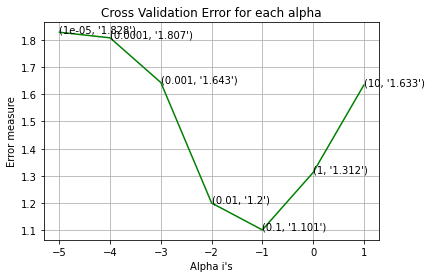

In [37]:
clf1 = SGDClassifier(alpha=0.0001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=0.0001, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")

clf3 = MultinomialNB(alpha=0.01)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(train_tfidf, y_train)
print("Logistic Regression :  cv Log Loss: %0.2f" % (metrics.log_loss(y_cv, sig_clf1.predict_proba(cv_tfidf))))
sig_clf2.fit(train_tfidf, y_train)
print("Support vector machine : cv Log Loss: %0.2f" % (metrics.log_loss(y_cv, sig_clf2.predict_proba(cv_tfidf))))
sig_clf3.fit(train_tfidf, y_train)
print("Naive Bayes : cv Log Loss: %0.2f" % (metrics.log_loss(y_cv, sig_clf3.predict_proba(cv_tfidf))))
print("-"*50)

alpha = [10 ** x for x in range(-5, 2)]

log_error_array = []
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    sclf.fit(train_tfidf, y_train)
    print("Stacking Classifer : For the value of alpha: %f   Log Loss: %0.3f" % (i, metrics.log_loss(y_cv, sclf.predict_proba(cv_tfidf))))
    log_error_array.append(metrics.log_loss(y_cv, sclf.predict_proba(cv_tfidf)))

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), log_error_array, c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],  str(txt)), (np.log10(alpha[i]), log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

#### 5.6.2 Testing the model with the best hyper parameters

The best alpha is 0.1
Log loss (train) on the stacking classifier : 0.3606265125187578
Log loss (cv) on the stacking classifier : 0.9595934555560197
Log loss (test) on the stacking classifier : 0.9349688763822768
-------------------- Confusion matrix --------------------


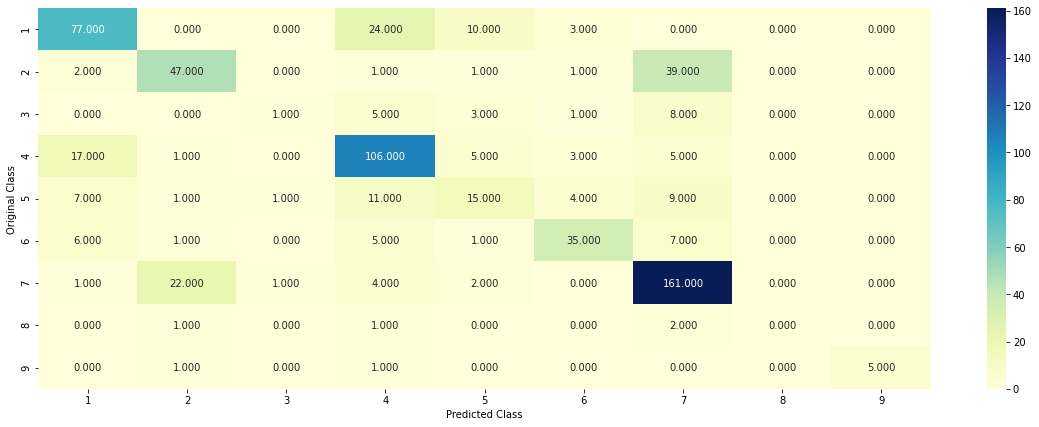

In [38]:
best_alpha = alpha[np.argmin(log_error_array)]
lr = LogisticRegression(C=best_alpha)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(train_tfidf, y_train)

print('The best alpha is {}'.format(best_alpha))
log_error = metrics.log_loss(y_train, sig_clf1.predict_proba(train_tfidf))
print("Log loss (train) on the stacking classifier :", log_error)

log_error = metrics.log_loss(y_cv, sig_clf1.predict_proba(cv_tfidf))
print("Log loss (cv) on the stacking classifier :", log_error)

log_error = metrics.log_loss(y_test, sig_clf1.predict_proba(test_tfidf))
print("Log loss (test) on the stacking classifier :", log_error)

plot_confusion_matrix(y_test, predict_y=sclf.predict(test_tfidf))

### 5.7 Maximum Voting classifier 

A Voting Classifier is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output.
It simply aggregates the findings of each classifier passed into Voting Classifier and predicts the output class based on the highest majority of voting. The idea is instead of creating separate dedicated models and finding the accuracy for each them, we create a single model which trains by these models and predicts output based on their combined majority of voting for each output class.

For more info <a href='http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html'>Maximum Voting classifier</a>

Log loss (train) on the VotingClassifier : 0.3985936549439659
Log loss (CV) on the VotingClassifier : 0.9993227833140376
Log loss (test) on the VotingClassifier : 0.9842882287531882
-------------------- Confusion matrix --------------------


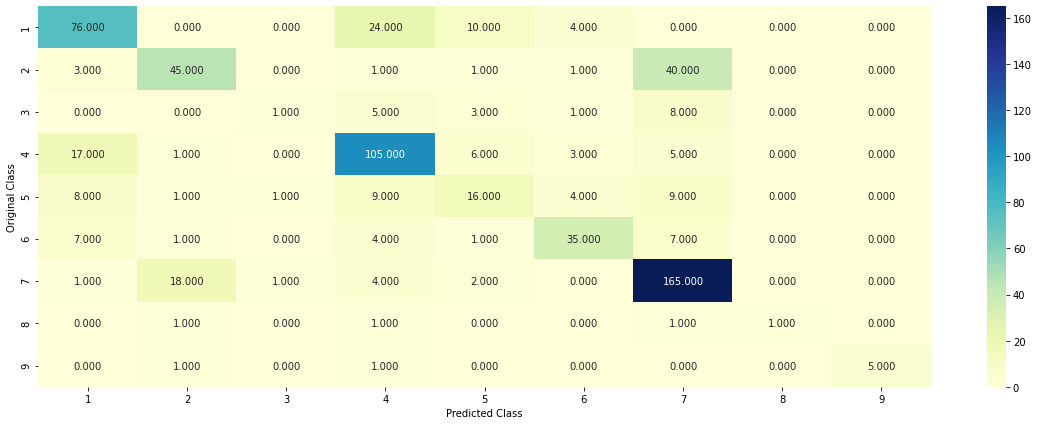

In [39]:
clf1 = SGDClassifier(alpha=0.0001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=0.0001, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")

clf3 = MultinomialNB(alpha=0.01)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

vclf = VotingClassifier(estimators=[('lr', sig_clf1), ('svc', sig_clf2), ('rf', sig_clf3)], voting='soft')
vclf.fit(train_tfidf, y_train)
print("Log loss (train) on the VotingClassifier :", metrics.log_loss(y_train, vclf.predict_proba(train_tfidf)))
print("Log loss (CV) on the VotingClassifier :", metrics.log_loss(y_cv, vclf.predict_proba(cv_tfidf)))
print("Log loss (test) on the VotingClassifier :", metrics.log_loss(y_test, vclf.predict_proba(test_tfidf)))
plot_confusion_matrix(y_test, vclf.predict(test_tfidf))

## 6. Comparison of all ML models

In [40]:
p = PrettyTable() 
p.field_names = ['Model', 'Best hyperparameter', 'Train log-loss', 'CV log-loss', 'Test log-loss'] 
p.add_row(['Random model', '-', '-', '2.4260', '2.5698']) 
p.add_row(['Naive Bayes', '0.001', '1.1113', '1.2221', '1.2040']) 
p.add_row(['Logistic regression (class balanced)', '0.0001', '0.3626', '0.9582', '0.9375']) 
p.add_row(['Logistic regression', '0.0001', '0.3520', '0.9609', '0.9355']) 
p.add_row(['Linear SVM', '0.0001', '0.3175', '1.0110', '0.9979']) 
p.add_row(['Stacking classifier', '0.1', '0.3606', '0.9595', '0.9349']) 
p.add_row(['Maximum voting classifier', '-', '0.3985', '0.9993', '0.9842']) 
print(p)

+--------------------------------------+---------------------+----------------+-------------+---------------+
|                Model                 | Best hyperparameter | Train log-loss | CV log-loss | Test log-loss |
+--------------------------------------+---------------------+----------------+-------------+---------------+
|             Random model             |          -          |       -        |    2.4260   |     2.5698    |
|             Naive Bayes              |        0.001        |     1.1113     |    1.2221   |     1.2040    |
| Logistic regression (class balanced) |        0.0001       |     0.3626     |    0.9582   |     0.9375    |
|         Logistic regression          |        0.0001       |     0.3520     |    0.9609   |     0.9355    |
|              Linear SVM              |        0.0001       |     0.3175     |    1.0110   |     0.9979    |
|         Stacking classifier          |         0.1         |     0.3606     |    0.9595   |     0.9349    |
|      Max